In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
from scipy import stats

In [3]:
#tube dimensions 
width = 10
height = 10

#size of intervals (mm) 
dx = 0.1
dy = 0.1 

#diffusion coefficient of the nutrients 
D_c = 1.e-10
#intial concentration of nutrients in the tube 
c_0 = 0.028 
#set the length of the timesteps 
dt = 0.01 
#define the amount of attractant consumed by the bacteria 
beta = 1E+3

#get the number of intervals 
nx, ny = int(width/dx), int(height/dy)

#create grid to make up concentration grid 
u0 = c_0 * np.ones((nx, ny))
u = u0.copy() #timesteps 

In [4]:
#generate some random bacteria positions 
rand_data = [[random.random()*width, random.random()*height] for _ in range(100)]

rand_data =pd.DataFrame(rand_data)
xmin = 0
xmax = width
ymin = 0
ymax = height
m1 = rand_data[0]
m2 = rand_data[1]

X, Y = np.mgrid[xmin:xmax:1j*nx, ymin:ymax:1j*ny] #this hear forms a grid which can subsequently be used for calculating the concentration 
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

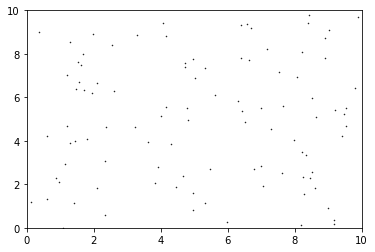

In [5]:
fig, ax = plt.subplots()
ax.plot(m1, m2, 'k.', markersize=1 )
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [6]:
# Create some dummy data
rvs = [np.array((random.random()*width, random.random()*height)) for _ in range(100)]
rvs = np.array(rvs)

kde = stats.kde.gaussian_kde(rvs.T)

# Regular grid to evaluate kde upon
x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():1j*nx]
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():1j*ny]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

z = kde(grid_coords.T)
z = z.reshape(nx,ny)
z = np.array(z)

# Calculate the Gaussian kernel manually

In [49]:
#create a grid to determine the density for 
rand_data = [[random.random()*width, random.random()*height] for _ in range(20)]
#rand_data = np.array(((40,40), (41,42), (41,41),(42,32.5), (1.5,1), (20,20), (50,10) ))
#find an appropriate decimal to round the values by 
round = int(-1*np.log10(dx))

dens_grid = [[[np.round(i*dx,round),np.round(j*dy,round)] for i in range(nx+1)] for j in range(ny+1)]

std = 0.001
def kernel(value, std): 
    K = (1/(np.sqrt(2*np.pi*std*std)))*np.exp((-value*value)/(2*std*std))
    return K 

#create a dataframe by summing the parts together 
kernel_sum = np.ones((ny, nx))

#placeholder numpy array 
for bacteria in rand_data: 
    bacteria_kernel = [[kernel(np.linalg.norm(np.array(dens_grid[j][i])-np.array(bacteria)),std) for i in range(nx)] for j in range(ny)]
    kernel_sum = kernel_sum + bacteria_kernel

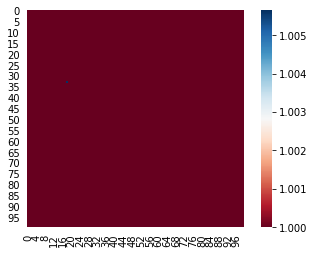

In [50]:
fig, ax = plt.subplots()
g = sns.heatmap(kernel_sum, cmap = 'RdBu', square = True)
#ax.plot(np.array(rand_data), 'k.', markersize=3)
g.tick_params(left=False, bottom=False)


In [51]:
R = 0.5 
gamma = 0.4
bacteria_kernel = [[kernel(np.linalg.norm(np.array(dens_grid[j][i])-(0,0)),R * gamma) for i in range(nx)] for j in range(ny)]

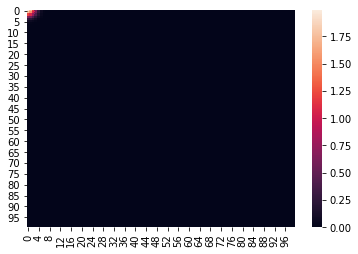

In [52]:
sns.heatmap(bacteria_kernel)

In [53]:
#pd.DataFrame(bacteria_kernel)
a = np.mean(bacteria_kernel)


#say we want the average to be 3 
scale = 1/a 
new = np.array(bacteria_kernel)*scale
np.mean(new)

1.0

In [54]:
new

array([[1106.21750211,  976.2335192 ,  670.95483134, ...,    0.        ,
           0.        ,    0.        ],
       [ 976.2335192 ,  861.52305689,  592.11556043, ...,    0.        ,
           0.        ,    0.        ],
       [ 670.95483134,  592.11556043,  406.95467649, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [116]:
 bacteria_kernel = [[np.linalg.norm(np.array(dens_grid[j][i])-np.array((0,0))) for i in range(nx)] for j in range(ny)]

In [117]:
pd.DataFrame(bacteria_kernel)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,...,99.000000,99.100000,99.200000,99.300000,99.400000,99.500000,99.600000,99.700000,99.800000,99.900000
1,0.1,0.141421,0.223607,0.316228,0.412311,0.509902,0.608276,0.707107,0.806226,0.905539,...,99.000051,99.100050,99.200050,99.300050,99.400050,99.500050,99.600050,99.700050,99.800050,99.900050
2,0.2,0.223607,0.282843,0.360555,0.447214,0.538516,0.632456,0.728011,0.824621,0.921954,...,99.000202,99.100202,99.200202,99.300201,99.400201,99.500201,99.600201,99.700201,99.800200,99.900200
3,0.3,0.316228,0.360555,0.424264,0.500000,0.583095,0.670820,0.761577,0.854400,0.948683,...,99.000455,99.100454,99.200454,99.300453,99.400453,99.500452,99.600452,99.700451,99.800451,99.900450
4,0.4,0.412311,0.447214,0.500000,0.565685,0.640312,0.721110,0.806226,0.894427,0.984886,...,99.000808,99.100807,99.200806,99.300806,99.400805,99.500804,99.600803,99.700802,99.800802,99.900801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.5,9.500526,9.502105,9.504736,9.508417,9.513149,9.518929,9.525755,9.533625,9.542536,...,99.454764,99.554307,99.653851,99.753396,99.852942,99.952489,100.052036,100.151585,100.251135,100.350685
96,9.6,9.600521,9.602083,9.604686,9.608330,9.613012,9.618732,9.625487,9.633276,9.642095,...,99.464365,99.563899,99.663434,99.762969,99.862505,99.962043,100.061581,100.161120,100.260660,100.360201
97,9.7,9.700515,9.702062,9.704638,9.708244,9.712878,9.718539,9.725225,9.732934,9.741663,...,99.474067,99.573591,99.673116,99.772642,99.872168,99.971696,100.071225,100.170754,100.270285,100.369816
98,9.8,9.800510,9.802041,9.804591,9.808160,9.812747,9.818350,9.824968,9.832599,9.841240,...,99.483868,99.583382,99.682897,99.782413,99.881930,99.981448,100.080967,100.180487,100.280008,100.379530


In [399]:
pd.DataFrame(kernel_sum)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.158461,1.158473,1.158485,1.158496,1.158507,1.158517,1.158526,1.158535,1.158543,1.158551,...,1.024211,1.024117,1.024024,1.023931,1.023838,1.023745,1.023653,1.023561,1.023469,1.023377
1,1.158488,1.158501,1.158513,1.158524,1.158535,1.158545,1.158554,1.158563,1.158571,1.158579,...,1.024215,1.024122,1.024028,1.023935,1.023842,1.023749,1.023657,1.023565,1.023473,1.023381
2,1.158516,1.158528,1.158540,1.158551,1.158562,1.158572,1.158581,1.158590,1.158598,1.158606,...,1.024220,1.024126,1.024032,1.023939,1.023846,1.023753,1.023661,1.023569,1.023477,1.023385
3,1.158542,1.158555,1.158567,1.158578,1.158588,1.158598,1.158608,1.158617,1.158625,1.158632,...,1.024224,1.024130,1.024036,1.023943,1.023850,1.023757,1.023665,1.023573,1.023481,1.023389
4,1.158568,1.158580,1.158592,1.158604,1.158614,1.158624,1.158634,1.158643,1.158651,1.158658,...,1.024227,1.024134,1.024040,1.023947,1.023854,1.023761,1.023669,1.023577,1.023485,1.023393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.158279,1.158292,1.158304,1.158315,1.158326,1.158336,1.158345,1.158354,1.158362,1.158369,...,1.024182,1.024088,1.023995,1.023902,1.023809,1.023717,1.023624,1.023532,1.023440,1.023349
96,1.158247,1.158260,1.158271,1.158283,1.158293,1.158303,1.158313,1.158321,1.158330,1.158337,...,1.024177,1.024083,1.023990,1.023897,1.023804,1.023712,1.023619,1.023527,1.023436,1.023344
97,1.158214,1.158227,1.158239,1.158250,1.158261,1.158271,1.158280,1.158289,1.158297,1.158304,...,1.024172,1.024078,1.023985,1.023892,1.023799,1.023707,1.023615,1.023523,1.023431,1.023339
98,1.158181,1.158193,1.158205,1.158216,1.158227,1.158237,1.158246,1.158255,1.158263,1.158271,...,1.024167,1.024073,1.023980,1.023887,1.023794,1.023702,1.023610,1.023518,1.023426,1.023334


In [385]:
#actually want the euclidean distance between bacteria and grid points  
b = [[np.linalg.norm(np.array(dens_grid[j][i])-np.array(rand_data[1])) for i in range(nx)] for j in range(ny)]
#get the kernel of b 
c = [[kernel(np.linalg.norm(np.array(dens_grid[j][i])-np.array(rand_data[1])),std) for i in range(nx)] for j in range(ny)]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.001273,0.001288,0.001303,0.001318,0.001334,0.001349,0.001365,0.001380,0.001396,0.001412,...,0.000594,0.000586,0.000578,0.000571,0.000563,0.000556,0.000548,0.000541,0.000534,0.000527
1,0.001275,0.001290,0.001305,0.001321,0.001336,0.001351,0.001367,0.001383,0.001398,0.001414,...,0.000595,0.000587,0.000579,0.000572,0.000564,0.000557,0.000549,0.000542,0.000535,0.000528
2,0.001278,0.001293,0.001308,0.001323,0.001338,0.001354,0.001369,0.001385,0.001401,0.001417,...,0.000596,0.000588,0.000580,0.000573,0.000565,0.000558,0.000550,0.000543,0.000536,0.000529
3,0.001280,0.001295,0.001310,0.001325,0.001340,0.001356,0.001371,0.001387,0.001403,0.001419,...,0.000597,0.000589,0.000581,0.000573,0.000566,0.000559,0.000551,0.000544,0.000537,0.000530
4,0.001282,0.001297,0.001312,0.001327,0.001342,0.001358,0.001374,0.001389,0.001405,0.001421,...,0.000598,0.000590,0.000582,0.000574,0.000567,0.000559,0.000552,0.000545,0.000538,0.000530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001338,0.001353,0.001369,0.001385,0.001401,0.001417,0.001434,0.001450,0.001467,0.001484,...,0.000624,0.000616,0.000607,0.000600,0.000592,0.000584,0.000576,0.000569,0.000561,0.000554
96,0.001337,0.001352,0.001368,0.001384,0.001400,0.001416,0.001433,0.001449,0.001466,0.001483,...,0.000623,0.000615,0.000607,0.000599,0.000591,0.000583,0.000576,0.000568,0.000561,0.000553
97,0.001336,0.001352,0.001367,0.001383,0.001399,0.001415,0.001432,0.001448,0.001465,0.001482,...,0.000623,0.000615,0.000607,0.000599,0.000591,0.000583,0.000575,0.000568,0.000560,0.000553
98,0.001335,0.001351,0.001366,0.001382,0.001398,0.001414,0.001431,0.001447,0.001464,0.001480,...,0.000622,0.000614,0.000606,0.000598,0.000590,0.000583,0.000575,0.000567,0.000560,0.000552


In [339]:
rand_data[1]

[9.436227442493205, 7.473943683579499]

In [362]:
pd.DataFrame(b)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,12.037534,11.959305,11.881403,11.803834,11.726604,11.649721,11.573191,11.497022,11.421220,11.345793,...,89.875075,89.974729,90.074384,90.174040,90.273696,90.373353,90.473011,90.572670,90.672329,90.771989
1,11.975702,11.897066,11.818754,11.740771,11.663124,11.585819,11.508864,11.432266,11.356032,11.280170,...,89.866815,89.966478,90.066142,90.165807,90.265472,90.365138,90.464805,90.564473,90.664141,90.763810
2,11.914388,11.835345,11.756622,11.678224,11.600158,11.522431,11.445050,11.368022,11.291354,11.215054,...,89.858665,89.958337,90.058010,90.157683,90.257358,90.357033,90.456709,90.556385,90.656062,90.755740
3,11.853601,11.774150,11.695015,11.616201,11.537715,11.459565,11.381757,11.304297,11.227194,11.150455,...,89.850625,89.950306,90.049988,90.149670,90.249354,90.349038,90.448722,90.548408,90.648094,90.747780
4,11.793348,11.713489,11.633941,11.554710,11.475804,11.397229,11.318993,11.241101,11.163561,11.086382,...,89.842696,89.942386,90.042077,90.141768,90.241460,90.341152,90.440846,90.540540,90.640234,90.739930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.651285,9.553536,9.455834,9.358181,9.260578,9.163027,9.065529,8.968086,8.870701,8.773374,...,89.586686,89.686660,89.786635,89.886609,89.986584,90.086559,90.186533,90.286508,90.386483,90.486458
96,9.672771,9.575242,9.477764,9.380339,9.282969,9.185656,9.088401,8.991206,8.894073,8.797005,...,89.589003,89.688975,89.788947,89.888919,89.988891,90.088863,90.188835,90.288807,90.388780,90.488752
97,9.695242,9.597941,9.500696,9.403509,9.306381,9.209315,9.112313,9.015376,8.918506,8.821707,...,89.591432,89.691401,89.791370,89.891340,89.991309,90.091278,90.191248,90.291218,90.391187,90.491157
98,9.718690,9.621626,9.524623,9.427682,9.330806,9.233997,9.137256,9.040587,8.943990,8.847470,...,89.593972,89.693939,89.793905,89.893872,89.993838,90.093805,90.193772,90.293738,90.393705,90.493672


In [360]:
pd.DataFrame(dens_grid)[70:80][94]

70    [9.4, 7.0]
71    [9.4, 7.1]
72    [9.4, 7.2]
73    [9.4, 7.3]
74    [9.4, 7.4]
75    [9.4, 7.5]
76    [9.4, 7.6]
77    [9.4, 7.7]
78    [9.4, 7.8]
79    [9.4, 7.9]
Name: 94, dtype: object

array([484.50223907,  35.11118511])

In [276]:
a = [[[dens_grid[j][i][0] -bacteria[0],dens_grid[j][i][1] - bacteria[0]] for i in range(nx)] for j in range(ny)]


In [278]:
pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,"[-484.5022390685601, -484.5022390685601]","[-483.5022390685601, -484.5022390685601]","[-482.5022390685601, -484.5022390685601]","[-481.5022390685601, -484.5022390685601]","[-480.5022390685601, -484.5022390685601]","[-479.5022390685601, -484.5022390685601]","[-478.5022390685601, -484.5022390685601]","[-477.5022390685601, -484.5022390685601]","[-476.5022390685601, -484.5022390685601]","[-475.5022390685601, -484.5022390685601]",...,"[505.4977609314399, -484.5022390685601]","[506.4977609314399, -484.5022390685601]","[507.4977609314399, -484.5022390685601]","[508.4977609314399, -484.5022390685601]","[509.4977609314399, -484.5022390685601]","[510.4977609314399, -484.5022390685601]","[511.4977609314399, -484.5022390685601]","[512.4977609314399, -484.5022390685601]","[513.4977609314399, -484.5022390685601]","[514.4977609314399, -484.5022390685601]"
1,"[-484.5022390685601, -483.5022390685601]","[-483.5022390685601, -483.5022390685601]","[-482.5022390685601, -483.5022390685601]","[-481.5022390685601, -483.5022390685601]","[-480.5022390685601, -483.5022390685601]","[-479.5022390685601, -483.5022390685601]","[-478.5022390685601, -483.5022390685601]","[-477.5022390685601, -483.5022390685601]","[-476.5022390685601, -483.5022390685601]","[-475.5022390685601, -483.5022390685601]",...,"[505.4977609314399, -483.5022390685601]","[506.4977609314399, -483.5022390685601]","[507.4977609314399, -483.5022390685601]","[508.4977609314399, -483.5022390685601]","[509.4977609314399, -483.5022390685601]","[510.4977609314399, -483.5022390685601]","[511.4977609314399, -483.5022390685601]","[512.4977609314399, -483.5022390685601]","[513.4977609314399, -483.5022390685601]","[514.4977609314399, -483.5022390685601]"
2,"[-484.5022390685601, -482.5022390685601]","[-483.5022390685601, -482.5022390685601]","[-482.5022390685601, -482.5022390685601]","[-481.5022390685601, -482.5022390685601]","[-480.5022390685601, -482.5022390685601]","[-479.5022390685601, -482.5022390685601]","[-478.5022390685601, -482.5022390685601]","[-477.5022390685601, -482.5022390685601]","[-476.5022390685601, -482.5022390685601]","[-475.5022390685601, -482.5022390685601]",...,"[505.4977609314399, -482.5022390685601]","[506.4977609314399, -482.5022390685601]","[507.4977609314399, -482.5022390685601]","[508.4977609314399, -482.5022390685601]","[509.4977609314399, -482.5022390685601]","[510.4977609314399, -482.5022390685601]","[511.4977609314399, -482.5022390685601]","[512.4977609314399, -482.5022390685601]","[513.4977609314399, -482.5022390685601]","[514.4977609314399, -482.5022390685601]"
3,"[-484.5022390685601, -481.5022390685601]","[-483.5022390685601, -481.5022390685601]","[-482.5022390685601, -481.5022390685601]","[-481.5022390685601, -481.5022390685601]","[-480.5022390685601, -481.5022390685601]","[-479.5022390685601, -481.5022390685601]","[-478.5022390685601, -481.5022390685601]","[-477.5022390685601, -481.5022390685601]","[-476.5022390685601, -481.5022390685601]","[-475.5022390685601, -481.5022390685601]",...,"[505.4977609314399, -481.5022390685601]","[506.4977609314399, -481.5022390685601]","[507.4977609314399, -481.5022390685601]","[508.4977609314399, -481.5022390685601]","[509.4977609314399, -481.5022390685601]","[510.4977609314399, -481.5022390685601]","[511.4977609314399, -481.5022390685601]","[512.4977609314399, -481.5022390685601]","[513.4977609314399, -481.5022390685601]","[514.4977609314399, -481.5022390685601]"
4,"[-484.5022390685601, -480.5022390685601]","[-483.5022390685601, -480.5022390685601]","[-482.5022390685601, -480.5022390685601]","[-481.5022390685601, -480.5022390685601]","[-480.5022390685601, -480.5022390685601]","[-479.5022390685601, -480.5022390685601]","[-478.5022390685601, -480.5022390685601]","[-477.5022390685601, -480.5022390685601]","[-476.5022390685601, -480.5022390685601]","[-475.5022390685601, -480.5022390685601]",...,"[505.4977609314399, -480.5022390685601]","[506.4977609314399, -480.5022390

In [215]:
std = 1

#work out a way to vectorise later 
for i in range(dens_grid.shape[0]): 
    for j in range(dens_grid.shape[1]): 
        
        for bacteria in rand_data: #iterate through each bacteria 
            value = dens_grid[i][j]-bacteria #actually has to be the sum of these values 
            K = kernel(value, std)
            
    

KeyboardInterrupt: 

In [ ]:
value


In [13]:
dx2, dy2 = dx*dx, dy*dy

def step_concentration(u0,u): 
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D_c * dt * ((u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2 + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )
    u[1:-1, 1:-1] = u[1:-1, 1:-1]-dt*beta*Z[1:-1,1:-1]
    #set such that the concentration cannot be lowered below zero 
    u[u < 0] = 0
    #incorporate the bacteria into this using vectorisation 
    u0 = u.copy()
    return u0, u

In [14]:
#define the number of time steps to go for 
nsteps = 10 
for m in range(nsteps):
    u0, u = step_concentration(u0, u)

<AxesSubplot:>

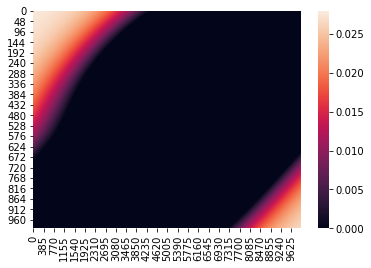

In [15]:
sns.heatmap(u0)

In [ ]:
#plot the locataions of the bacteria 


# Read in Concentration file
Read in to get the format of the read it file correct

In [10]:
pd.DataFrame(a.T)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,14.905236,15.019435,14.597720,13.688305,12.390985,10.839138,9.177269,7.539310,6.032041,4.726151,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,17.460004,17.593313,17.092437,16.014639,14.478167,12.640934,10.673947,8.735629,6.952236,5.407304,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,19.779473,19.930347,19.357834,18.127383,16.373973,14.277772,12.033830,9.822808,7.788654,6.026584,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,21.651029,21.816632,21.186876,19.833753,17.905682,15.600754,13.133408,10.702262,8.465568,6.528008,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,22.888066,23.064381,22.397754,20.964392,18.921509,16.478982,13.864057,11.287244,8.916310,6.862269,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,23.360565,23.542640,22.863572,21.400988,19.315309,16.820824,14.149649,11.516890,9.094050,6.994683,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,23.017593,23.199917,22.534235,21.096643,19.044829,16.589640,13.959607,11.366638,8.979793,6.911114,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,21.896343,22.073308,21.445319,20.084166,18.139168,15.810247,13.314286,10.852544,8.585720,6.620448,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,20.115492,20.281883,19.711744,18.470252,16.693621,14.564534,12.281387,10.028460,7.953051,6.153045,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,17.854520,18.005974,17.507808,16.416976,14.853184,12.977305,10.964274,8.976763,7.144958,5.555524,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


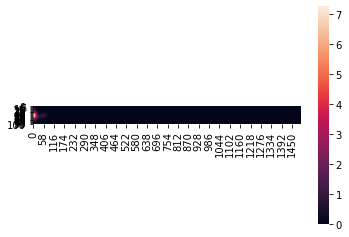

In [124]:
#when 20 cells present 
import pandas as pd
import seaborn as sns
a = pd.read_csv('density_field.csv')
sns.heatmap(a.T, square = True)

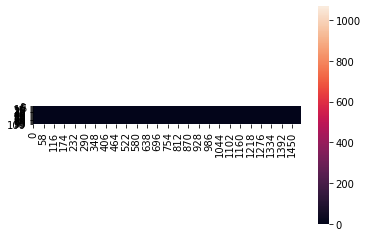

In [129]:
#50 cells present 
import pandas as pd
import seaborn as sns
a = pd.read_csv('density_field.csv')
sns.heatmap(a.T, square = True)

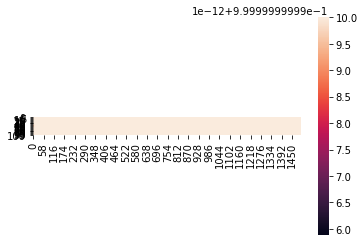

In [130]:
b = pd.read_csv('concentration_field.csv')
sns.heatmap(b.T, square = True)

In [21]:
#try a multivariate kernel 
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [8]:
nobs = 300
np.random.seed(1234)  # Seed random generator
c1 = np.random.normal(size=(nobs,1))
c2 = np.random.normal(2, 1, size=(nobs,1))

In [12]:
width = 100 
height = 10
rand_data = [[random.random()*width, random.random()*height] for _ in range(20)]

In [96]:
len(data)

180

### Example in 3 dimensions

In [97]:
import numpy as np
from scipy import stats
import pandas as pd

data = np.array([[1, 4], [2, .6], [2, 1],
         [2, 0.5], [5, .5], [0, 0],
         [1, 4], [5, .5], [2, .5]]*2)
#data = [[1, 4], [2,4],[3,4]]

agent_positions = data
X, Y = np.mgrid[0:width:(nx + 1) * 1j, 0:height:(ny + 1) * 1j]
#get the coordinates in the grid
positions = np.vstack([X.ravel(), Y.ravel()])

dens = sm.nonparametric.KDEMultivariate(data = agent_positions, var_type = 'cc')

#get the bandwidth matrix
bw = dens.bw

#get the density at each grid point
bact_dens = dens.pdf(positions)
bact_dens = np.reshape(bact_dens.T, X.shape)




0.0006975626641688137

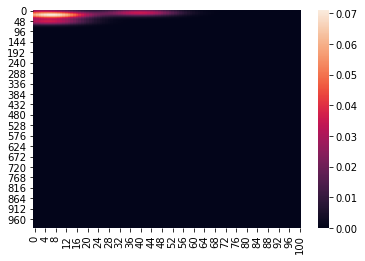

In [98]:
#1
sns.heatmap(bact_dens)
np.mean(bact_dens)


In [83]:
np.sum(bact_dens)*(1/1)

67.85343338529512

0.8383907139845838

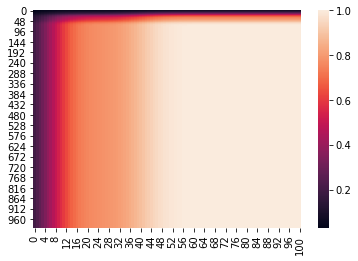

In [91]:
#10
sns.heatmap(bact_dens)
np.mean(bact_dens)

7.572616590331558e-05

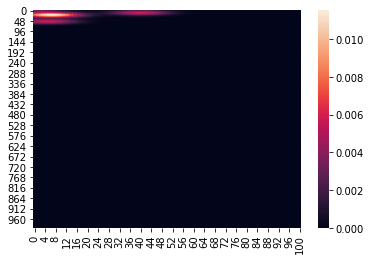

In [93]:
bact_dens = bact_dens*(1/10)
sns.heatmap(bact_dens)
np.mean(bact_dens)

0.0008324589962373897

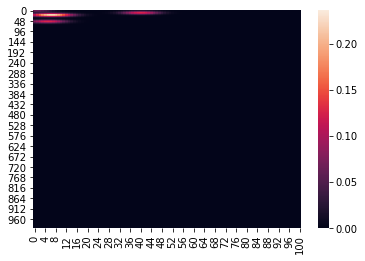

In [57]:
#100
sns.heatmap(bact_dens)
np.mean(bact_dens)

In [58]:
np.sum(bact_dens)

84.16243697859633